
- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [137]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import json
from pprint import pprint
from functions_variables import encode_tags, extract_info
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
%load_ext autoreload
%autoreload 2
# Chnage custom function and jupyter function without restarting kernel

In [4]:

# Define the directory containing JSON files
json_directory = '../data/raw_files/'

# Get all JSON file paths in the specified directory
json_file_paths = glob.glob(os.path.join(json_directory, '*.json'))

# Empty DataFrame
data = pd.DataFrame()

# Loop through each file path
for path in json_file_paths:
    with open(path, 'r') as file:
        jsonfile = json.load(file)
    # Normalize the nested JSON data and append to the dataframe
    newdata = pd.json_normalize(jsonfile['data']['results'])
    data = pd.concat([data, newdata], ignore_index=True)



In [15]:
data.head()

,last_update_date,tags,permalink,status,list_date,open_houses,branding,list_price,property_id,photos,...,location.county.fips_code,location.county.name,primary_photo,source,products,location.address.coordinate,other_listings,community.advertisers,community.description.name,location.county
0,2023-09-19T20:52:50Z,"[carport, community_outdoor_space, cul_de_sac,...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,None,"[{'name': 'EXP Realty LLC - Southeast Alaska',...",554950.0,9074430767,"[{'tags': [{'label': 'house_view', 'probabilit...",...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9424983842,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9479068516,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9879331943,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,None,None,"[{'name': None, 'photo': None, 'type': 'Office'}]",NaN,9521639574,None,...,None,Juneau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning 


In [5]:
#Count the number of missing values in each column
data.isnull().sum()

last_update_date                 66
tags                            553
permalink                        32
status                           32
list_date                       439
                               ... 
location.address.coordinate    8191
other_listings                 8191
community.advertisers          8186
community.description.name     8186
location.county                8191
Length: 67, dtype: int64

In [6]:
#Drop columns with more than 50% missing values
data = data.dropna(thresh=0.5*len(data), axis=1)


In [7]:
data.columns

Index(['last_update_date', 'tags', 'permalink', 'status', 'list_date',
       'branding', 'list_price', 'property_id', 'photos', 'listing_id',
       'matterport', 'primary_photo.href', 'source.agents', 'source.type',
       'description.year_built', 'description.sold_date',
       'description.sold_price', 'description.baths_full',
       'description.lot_sqft', 'description.sqft', 'description.baths',
       'description.garage', 'description.stories', 'description.beds',
       'description.type', 'lead_attributes.show_contact_an_agent',
       'flags.is_new_listing', 'products.brand_name', 'other_listings.rdc',
       'location.address.postal_code', 'location.address.state',
       'location.address.coordinate.lon', 'location.address.coordinate.lat',
       'location.address.city', 'location.address.state_code',
       'location.address.line', 'location.street_view_url',
       'location.county.fips_code', 'location.county.name'],
      dtype='object')

In [8]:
#Selecting relevant columns

rel_columns = ['description.year_built', 'tags', 'permalink', 'status', 'list_price', 'property_id', 'listing_id', 'primary_photo.href',
                'description.sold_date', 'description.sold_price','description.lot_sqft', 'description.sqft', 'description.baths',
                'description.garage','description.beds','location.address.postal_code', 'location.address.state','location.address.city']

data_rel = data[rel_columns]

In [9]:
new_names = ['year_built', 'tags', 'permalink', 'status', 'list_price', 'property_id', 'listing', 'primary_photo',
                'sold_date', 'sold_price','lot_sqft', 'sqft', 'baths', 'garages', 'beds','postal_code', 'state','city']

data_rel.columns = new_names        

In [10]:
data_rel.head()


,year_built,tags,permalink,status,list_price,property_id,listing,primary_photo,sold_date,sold_price,lot_sqft,sqft,baths,garages,beds,postal_code,state,city
0,1963.0,"[carport, community_outdoor_space, cul_de_sac,...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,554950.0,9074430767,2957241843,https://ap.rdcpix.com/07097d34c98a59ebb7996889...,2023-09-18,None,10454.0,1821.0,2.0,1.0,3.0,99801,Alaska,Juneau
1,NaN,None,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,NaN,9424983842,None,NaN,2023-08-22,None,NaN,NaN,NaN,NaN,NaN,99801,Alaska,Juneau
2,NaN,None,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,NaN,9479068516,None,NaN,2023-08-22,None,NaN,NaN,NaN,NaN,NaN,99801,Alaska,Juneau
3,NaN,None,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,NaN,9879331943,None,NaN,2023-08-21,None,NaN,NaN,NaN,NaN,NaN,99801,Alaska,Juneau
4,NaN,None,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,NaN,9521639574,None,NaN,2023-08-21,None,NaN,NaN,NaN,NaN,NaN,99801,Alaska,Juneau


In [11]:
data_rel.to_csv('../data/dataframes/raw_merged_df_data.csv') #Save the data to a csv file

In [12]:
data_rel.dtypes

year_built       float64
tags              object
permalink         object
status            object
list_price       float64
property_id       object
listing           object
primary_photo     object
sold_date         object
sold_price        object
lot_sqft         float64
sqft             float64
baths            float64
garages          float64
beds             float64
postal_code       object
state             object
city              object
dtype: object

In [13]:
#Removing nulls 
data_rel['sold_price'] = pd.to_numeric(data_rel['sold_price'], errors='coerce')
dataframe = data_rel[(data_rel['sold_price'] > 0) &
                     (data_rel['list_price'] > 0) &
                     (data_rel['baths'] > 0) &
                     (data_rel['lot_sqft'] > 0) &
                     (data_rel['sqft'] > 0) &
                     (data_rel['year_built'] > 0) &
                     (data_rel['beds'] > 0)]



In [14]:
data_rel['garages'].fillna(0, inplace=True)

In [15]:
data_rel.dropna(inplace=True)

In [16]:
#Convert float to int for year_built, beds, baths, garages, lot_sqft, sqft
data_rel['year_built'] = data_rel['year_built'].astype(int)
data_rel['beds'] = data_rel['beds'].astype(int)
data_rel['baths'] = data_rel['baths'].astype(int)
data_rel['garages'] = data_rel['garages'].astype(int)
data_rel['lot_sqft'] = data_rel['lot_sqft'].astype(int)
data_rel['sqft'] = data_rel['sqft'].astype(int)


In [17]:
#Encode tags
#Testing the function 
testing  = data_rel.head(25)
testing_tags = encode_tags(testing)

In [18]:
#Applying the function to the entire dataset
data_rel = encode_tags(data_rel)


In [19]:
#Count the number of unique tags using the new columns
just_tags = data_rel.iloc[:, 18:]

In [20]:
#Count the number of values in each unique tag
counts_tags = just_tags.sum().sort_values(ascending=False)

In [21]:
#See the top 20 tags
counts_tags.head(20)

garage_1_or_more               3290
central_air                    2911
community_outdoor_space        2721
basement                       2535
dishwasher                     2517
fireplace                      2497
forced_air                     2335
garage_2_or_more               2263
two_or_more_stories            2251
single_story                   2215
hardwood_floors                1877
washer_dryer                   1565
laundry_room                   1504
shopping                       1339
dining_room                    1125
community_security_features    1122
recreation_facilities          1103
view                            988
central_heat                    968
family_room                     945
dtype: int64

In [22]:
#Drop the columns with less than 1000 values (approx half of the data)
data_rel = data_rel.drop(columns=counts_tags[counts_tags < 1000].index)


In [23]:
#Drop laundry_room
data_rel = data_rel.drop(columns=['laundry_room'])

In [24]:
#Change the tag columns to categorical (maybe)
#data_rel.iloc[:, 18:] = data_rel.iloc[:, 18:].astype('category')


In [25]:
data_rel.describe()

,year_built,list_price,sold_price,lot_sqft,sqft,baths,garages,beds,recreation_facilities,single_story,...,garage_2_or_more,two_or_more_stories,forced_air,shopping,central_air,basement,community_outdoor_space,dishwasher,fireplace,washer_dryer
count,5007.000000,5.007000e+03,5.007000e+03,5.007000e+03,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,...,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000,5007.000000
mean,1966.404434,4.327309e+05,4.251500e+05,1.562188e+05,1934.589375,2.334332,1.191732,3.336129,0.220292,0.442381,...,0.451967,0.449571,0.466347,0.267426,0.581386,0.506291,0.543439,0.502696,0.498702,0.312562
std,34.675178,5.749692e+05,5.584667e+05,4.392940e+06,1043.020121,1.038831,1.204925,1.251551,0.414485,0.496719,...,0.497737,0.497500,0.498916,0.442660,0.493381,0.500010,0.498159,0.500043,0.500048,0.463584
min,1836.000000,1.990000e+04,9.000000e+03,0.000000e+00,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1947.000000,2.250000e+05,2.215000e+05,4.792000e+03,1288.000000,2.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,3.300000e+05,3.300000e+05,7.675000e+03,1680.000000,2.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1995.000000,4.949000e+05,4.850000e+05,1.176100e+04,2277.000000,3.000000,2.000000,4.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2023.000000,1.250000e+07,1.250000e+07,1.390435e+08,11218.000000,9.000000,11.000000,12.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
#count the 1s and 0s in each tag column 
data_rel.iloc[:, 18:].apply(pd.Series.value_counts)

,recreation_facilities,single_story,garage_1_or_more,hardwood_floors,dining_room,community_security_features,garage_2_or_more,two_or_more_stories,forced_air,shopping,central_air,basement,community_outdoor_space,dishwasher,fireplace,washer_dryer
0,3904,2792,1717,3130,3882,3885,2744,2756,2672,3668,2096,2472,2286,2490,2510,3442
1,1103,2215,3290,1877,1125,1122,2263,2251,2335,1339,2911,2535,2721,2517,2497,1565


In [27]:
#saving the clean data to csv file
data_rel.to_csv('../data/dataframes/cleaned_data_eda.csv')

At this point, ensure that you have all sales in a dataframe.
- Is each cell one value, or do some cells have lists?
- Maybe the "tags" will help create some features.
- What are the data types of each column?
- Some sales may not actually include the sale price.  These rows should be dropped.
- Some sales don't include the property type.
- There are a lot of None values.  Should these be dropped or replaced with something?

In [74]:
dff = pd.read_csv('../data/dataframes/cleaned_data_eda.csv', index_col=0)   

In [76]:
dff.dtypes
#Change the sold_date to datetime
dff['sold_date'] = pd.to_datetime(dff['sold_date'], errors='coerce')

In [77]:
#Drop the tags column
data_rel = dff.drop(columns=['tags'])

Consider the fact that with tags, there are a lot of categorical variables.
- How many columns would we have if we OHE tags, city and state?
- Perhaps we can get rid of tags that have a low frequency.

In [78]:
# OHE categorical variables here
# tags will have to be done manually
data_rel = pd.get_dummies(data_rel, columns=['status'], drop_first=True)


In [82]:
data_rel.columns

Index(['year_built', 'permalink', 'list_price', 'property_id', 'listing',
       'primary_photo', 'sold_date', 'sold_price', 'lot_sqft', 'sqft', 'baths',
       'garages', 'beds', 'postal_code', 'state', 'city',
       'recreation_facilities', 'single_story', 'garage_1_or_more',
       'hardwood_floors', 'dining_room', 'community_security_features',
       'garage_2_or_more', 'two_or_more_stories', 'forced_air', 'shopping',
       'central_air', 'basement', 'community_outdoor_space', 'dishwasher',
       'fireplace', 'washer_dryer'],
      dtype='object')

In [81]:
data_rel.shape

(5007, 32)

In [83]:
#export the data to a csv file
data_rel.to_csv('../data/dataframes/cleaned_data_eda2.csv')

### Write something here before split 

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE such as using central tendency?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- If you replace cities or states with numerical values, make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Drop columns that aren't needed.
- Don't keep the list price because it will be too close to the sale price.

In [13]:
# perform train test split here
# do something with state and city
# drop any other not needed columns

In [84]:
#drop List price
data_rel = data_rel.drop(columns=['list_price'])

In [85]:
#Train test split 
X = data_rel.drop(columns=['sold_price'], axis=1)
Y = data_rel['sold_price']

In [86]:
#Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [87]:
#Check the shape of the training and testing sets
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4005, 30), (1002, 30), (4005,), (1002,))

In [88]:
#Export the data to csv files
X_train.to_csv('../data/dataframes/X_train.csv', index=False)
X_test.to_csv('../data/dataframes/X_test.csv', index=False)
Y_train.to_csv('../data/dataframes/Y_train.csv', index=False)
Y_test.to_csv('../data/dataframes/Y_test.csv', index=False)


In [89]:
encoder = ce.TargetEncoder(cols=['city'])

In [90]:
X_train_encoded = encoder.fit_transform(X_train, Y_train)

In [91]:
X_test_encoded = encoder.transform(X_test)

In [145]:
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X_train_encoded, Y_train, test_size=0.2, random_state=42)


In [146]:
X_train_e.shape, X_test_e.shape, Y_train_e.shape, Y_test_e.shape

((3204, 30), (801, 30), (3204,), (801,))

In [147]:
#exporting this 
X_train_e.to_csv('../data/dataframes/X_train_encoded.csv', index=False)
X_test_e.to_csv('../data/dataframes/X_test_encoded.csv', index=False)
Y_train_e.to_csv('../data/dataframes/Y_train_encoded.csv', index=False)
Y_test_e.to_csv('../data/dataframes/Y_test_encoded.csv', index=False)


Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [100]:
# perform EDA here
numerical = data_rel.iloc[:, 6:12]


In [102]:
numerical.describe()

,sold_price,lot_sqft,sqft,baths,garages,beds
count,5.007000e+03,5.007000e+03,5007.000000,5007.000000,5007.000000,5007.000000
mean,4.251500e+05,1.562188e+05,1934.589375,2.334332,1.191732,3.336129
std,5.584667e+05,4.392940e+06,1043.020121,1.038831,1.204925,1.251551
min,9.000000e+03,0.000000e+00,120.000000,0.000000,0.000000,0.000000
25%,2.215000e+05,4.792000e+03,1288.000000,2.000000,0.000000,3.000000
50%,3.300000e+05,7.675000e+03,1680.000000,2.000000,1.000000,3.000000
75%,4.850000e+05,1.176100e+04,2277.000000,3.000000,2.000000,4.000000
max,1.250000e+07,1.390435e+08,11218.000000,9.000000,11.000000,12.000000


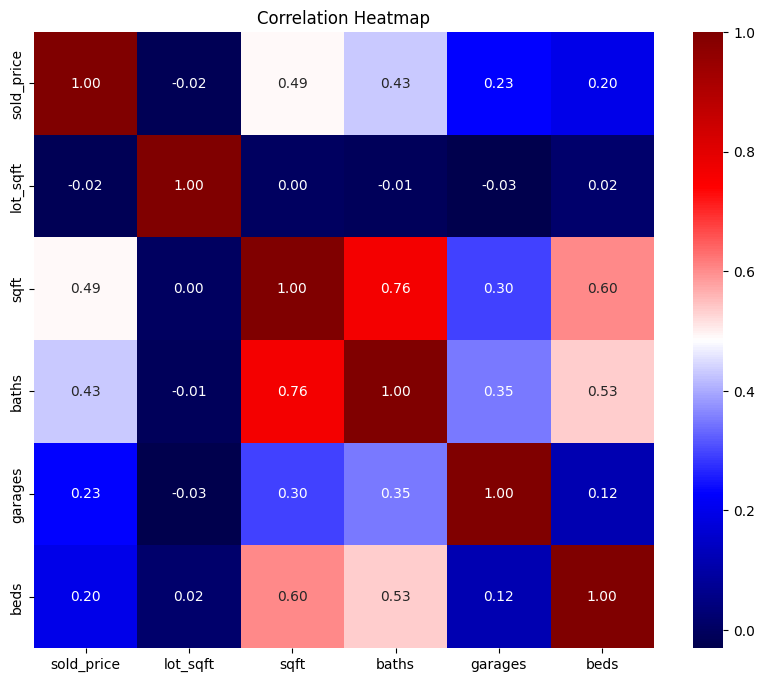

<Figure size 640x480 with 0 Axes>

In [105]:
#Correlation heatmap 
corr = numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='seismic', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

plt.savefig('../images/correlation_heatmap.png')

### Explanation of the heatmap 

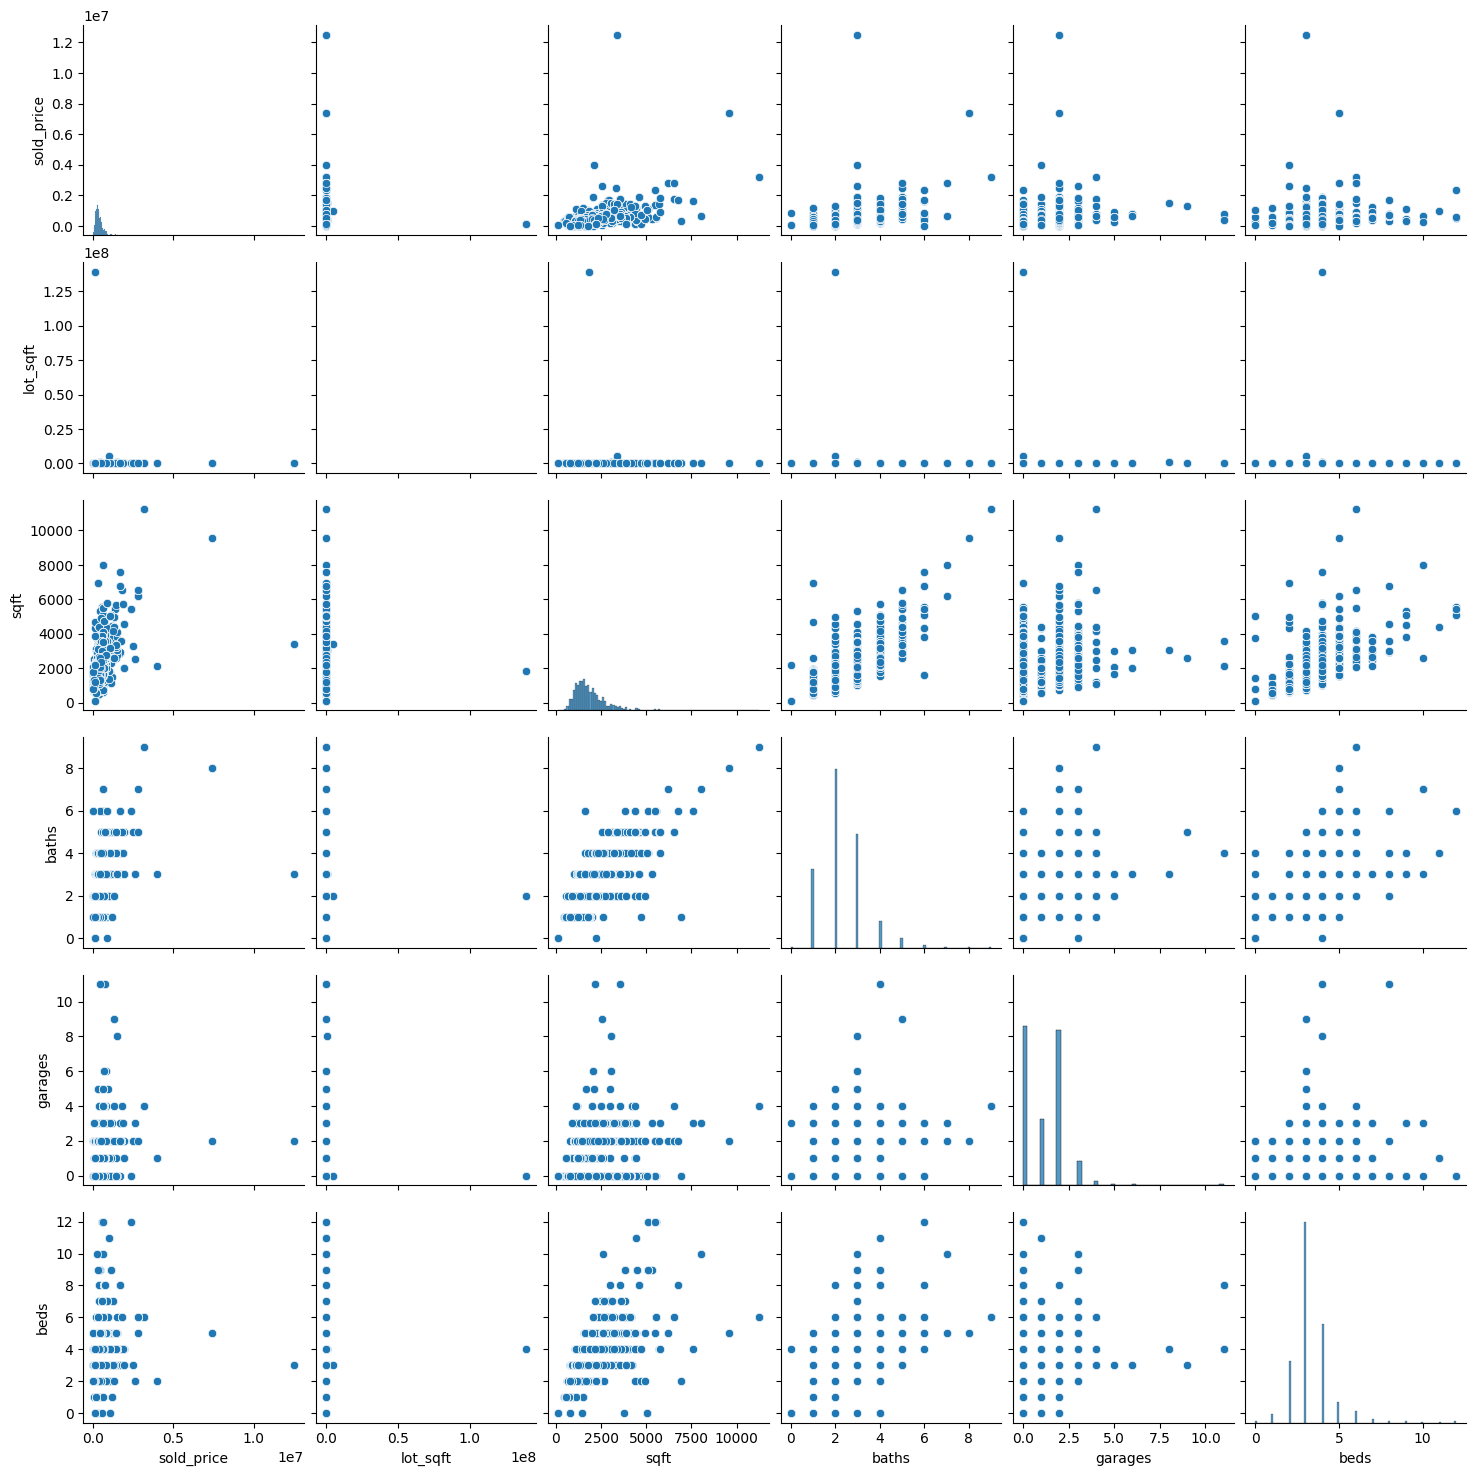

In [106]:
#Pairplot
sns.pairplot(numerical)
plt.show()


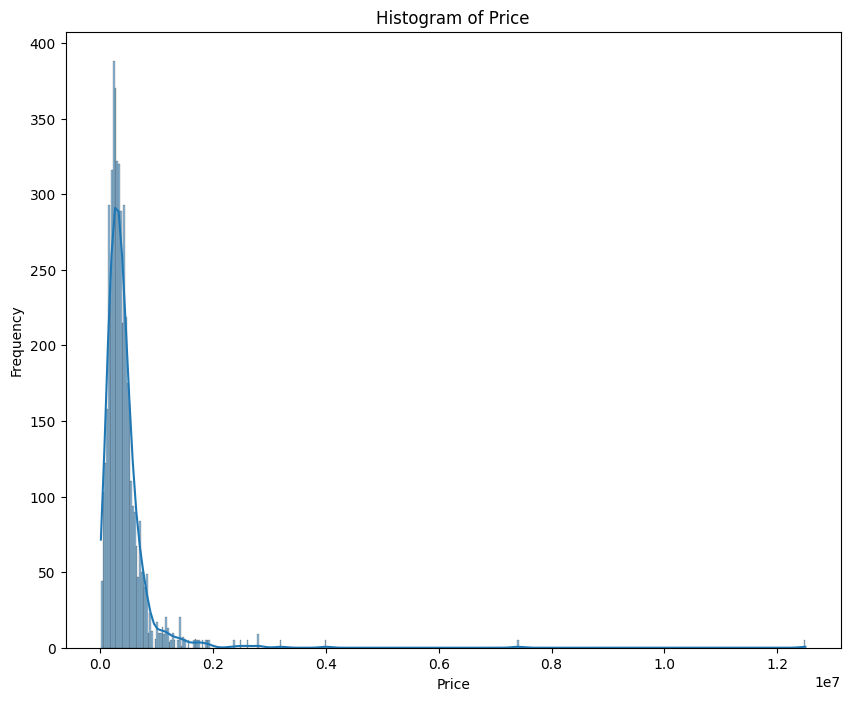

In [107]:
#Histogram of sold price
plt.figure(figsize=(10, 8))
sns.histplot(data_rel['sold_price'], kde=True)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Explanation 

Very right skewed 

In [108]:
#Top 10 cities with the highest number of listings
top_cities = data_rel['city'].value_counts().head(10)

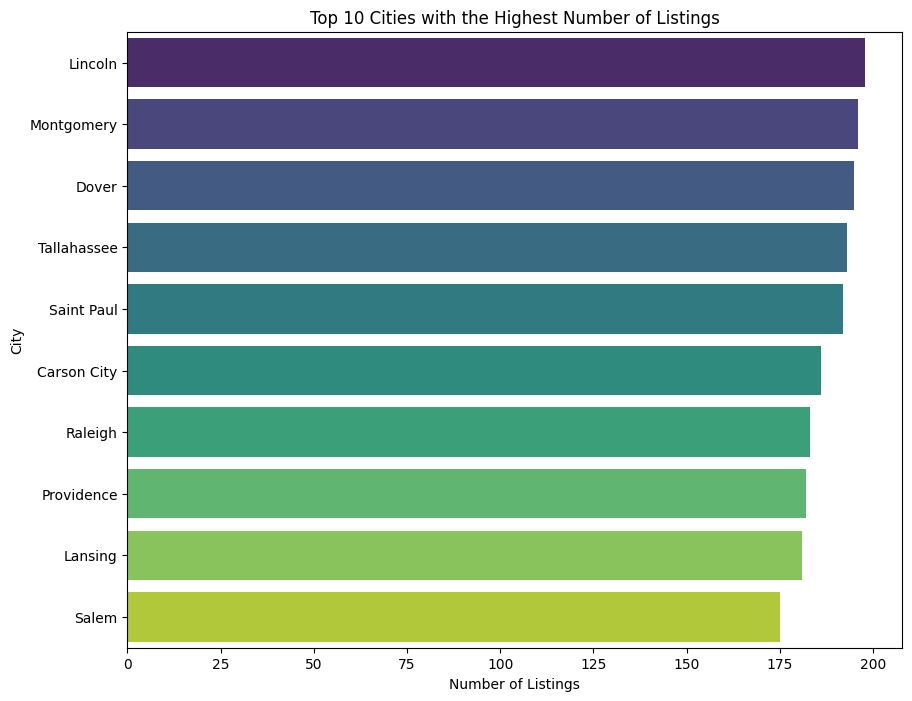

In [110]:
#Plot the top 10 cities
plt.figure(figsize=(10, 8))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Cities with the Highest Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('City')
plt.show()


In [111]:
#Cities with the highest selling prices
city_prices = data_rel.groupby('city')['sold_price'].mean().sort_values(ascending=False).head(10)


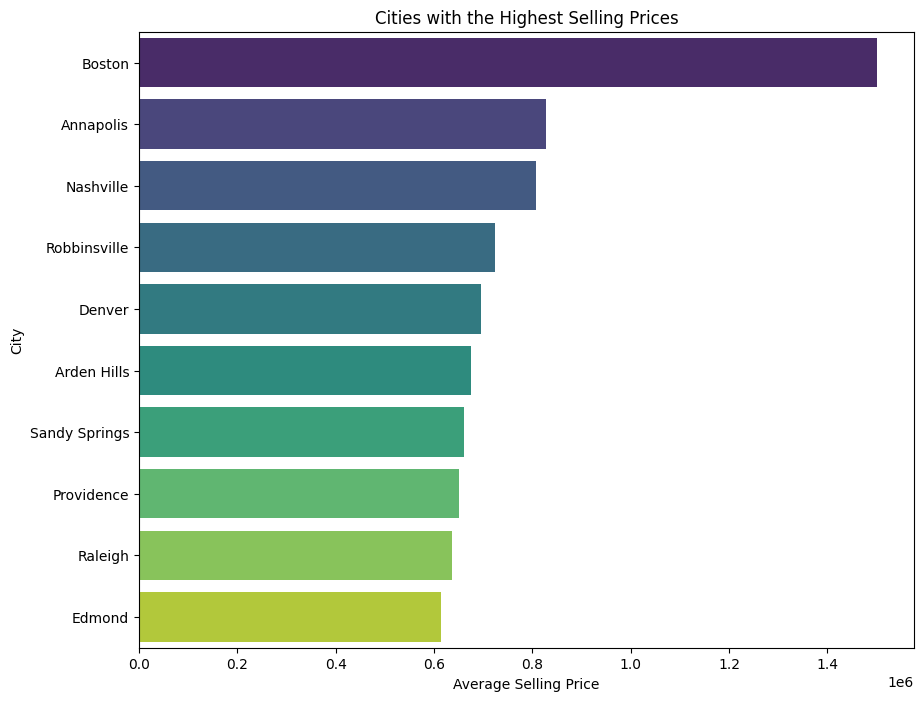

In [112]:
#Plot the cities with the highest selling prices
plt.figure(figsize=(10, 8))
sns.barplot(x=city_prices.values, y=city_prices.index, palette='viridis')
plt.title('Cities with the Highest Selling Prices')
plt.xlabel('Average Selling Price')
plt.ylabel('City')
plt.show()


In [127]:
#Plot the average price of houses sold in each city
city_prices = data_rel.groupby('city')['sold_price'].mean().sort_values(ascending=False)


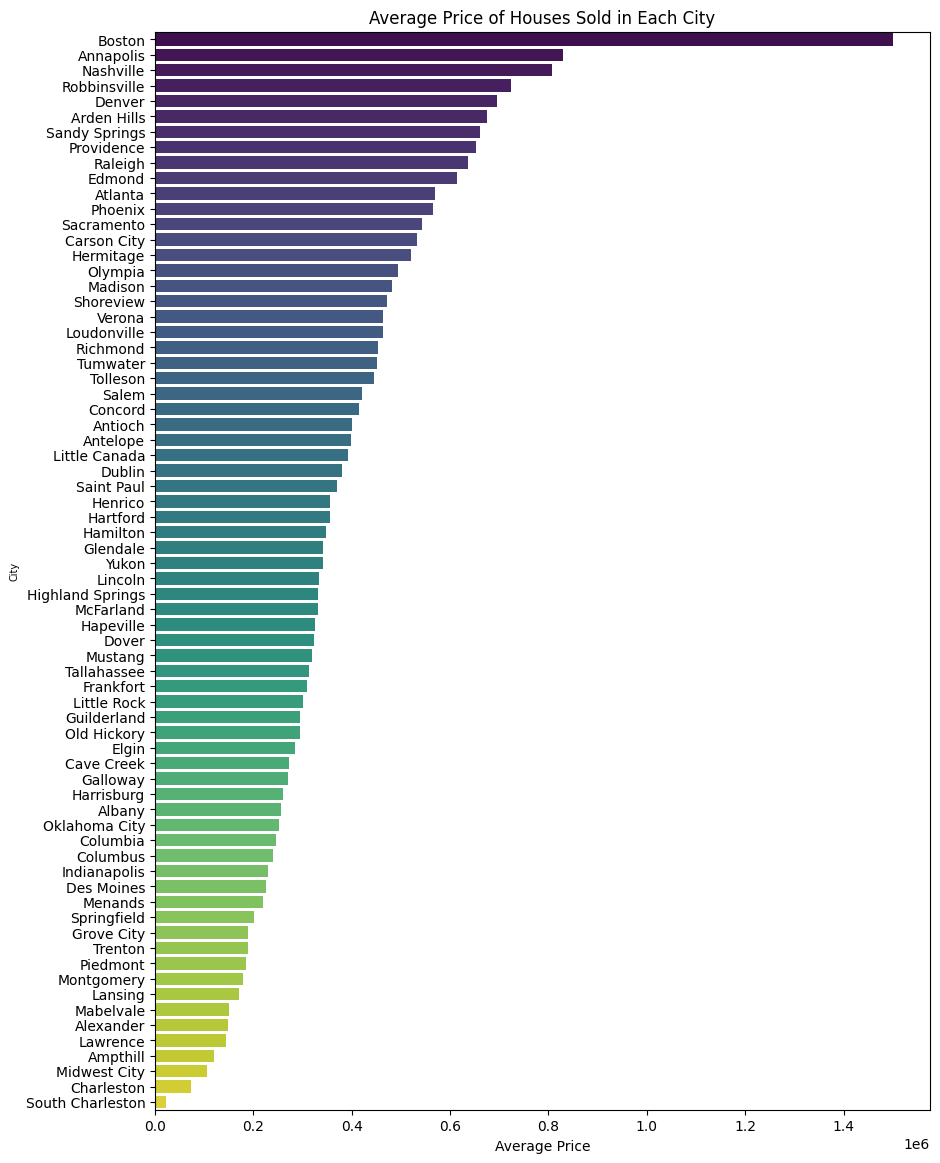

<Figure size 640x480 with 0 Axes>

In [132]:
plt.figure(figsize=(10, 14))
sns.barplot(x=city_prices.values, y=city_prices.index, palette='viridis')
plt.title('Average Price of Houses Sold in Each City')
plt.xlabel('Average Price')
plt.ylabel('City', fontsize=7)
plt.show()

plt.savefig('../images/average_price_city.png')

In [113]:
#Top 10 year builts with the highest number of listings
data_rel['year_built'].value_counts().head(10)

year_built
1920    139
1950    119
1900     97
1930     96
1978     90
2004     90
2003     87
1960     83
1989     83
1965     81
Name: count, dtype: int64

In [115]:
#What dates are houses sold the most
data_rel['sold_date'].dt.date.value_counts().head(10)

sold_date
2024-01-12    950
2024-01-11    469
2024-01-05    436
2024-01-10    413
2024-01-08    323
2023-12-29    249
2024-01-09    214
2024-01-16    195
2023-12-22    191
2024-01-02    142
Name: count, dtype: int64

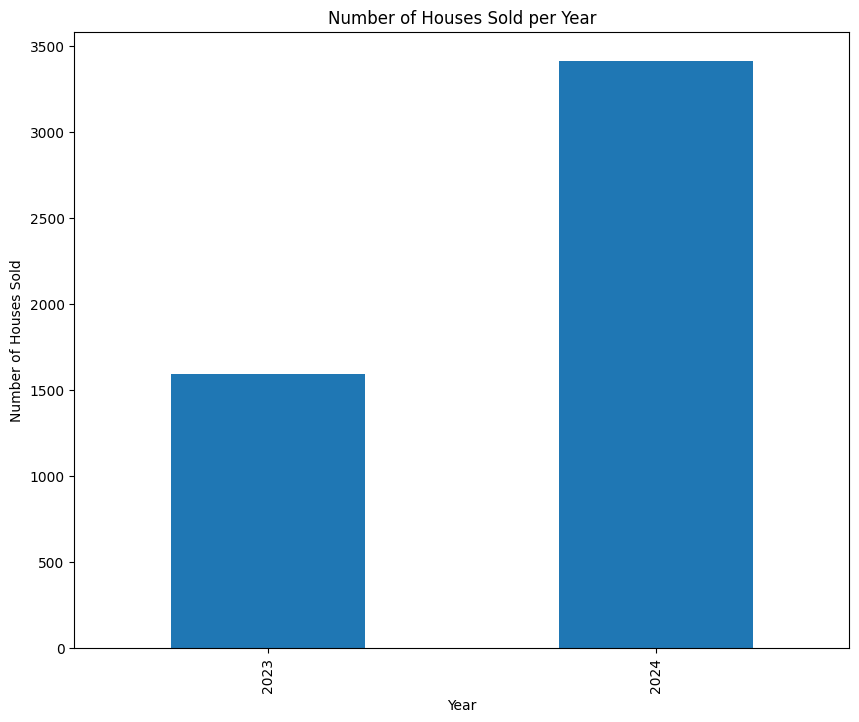

In [116]:
#Plot the number of houses sold per year
plt.figure(figsize=(10, 8))
data_rel['sold_date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Houses Sold per Year')
plt.xlabel('Year')
plt.ylabel('Number of Houses Sold')
plt.show()

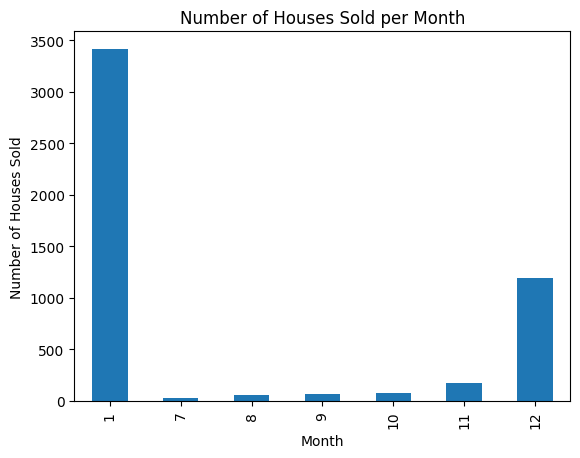

In [119]:
data_rel['sold_date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Houses Sold per Month')
plt.xlabel('Month')
plt.ylabel('Number of Houses Sold')
plt.show()

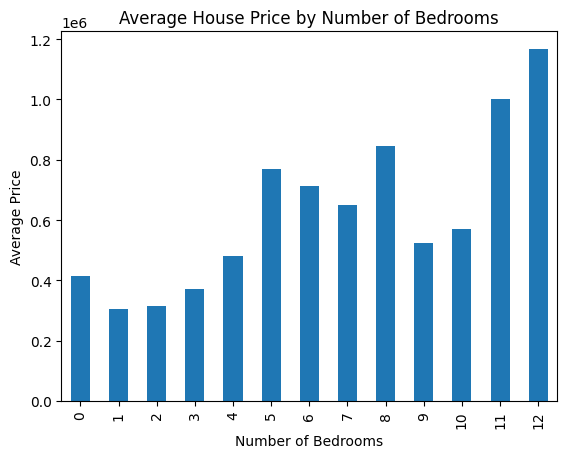

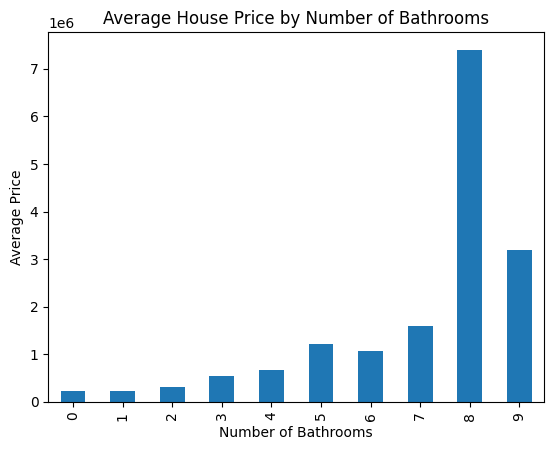

<Figure size 640x480 with 0 Axes>

In [134]:
data_rel.groupby('beds')['sold_price'].mean().plot(kind='bar')
plt.title('Average House Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

plt.savefig('../images/average_price_beds.png')

data_rel.groupby('baths')['sold_price'].mean().plot(kind='bar')
plt.title('Average House Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.show()

plt.savefig('../images/average_price_baths.png')


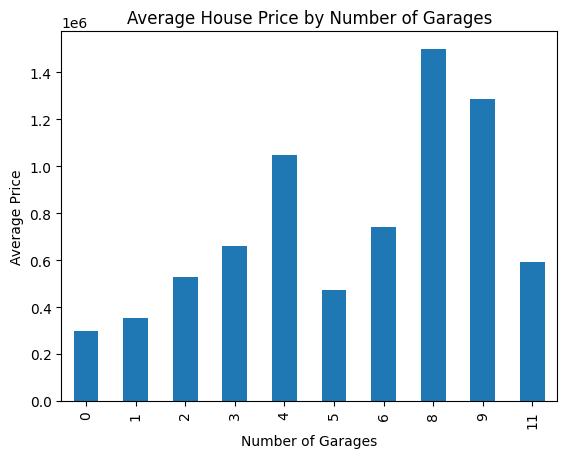

<Figure size 640x480 with 0 Axes>

In [133]:
data_rel.groupby('garages')['sold_price'].mean().plot(kind='bar')
plt.title('Average House Price by Number of Garages')
plt.xlabel('Number of Garages')
plt.ylabel('Average Price')
plt.show()

plt.savefig('../images/average_price_garages.png')

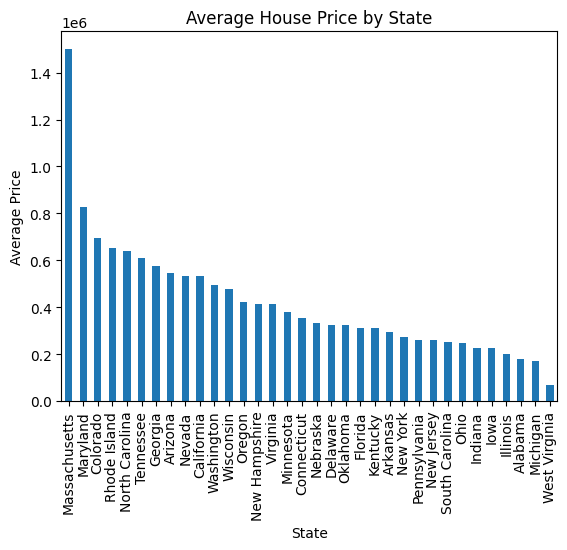

In [136]:
#Analyzing the average price of houses sold in each state
data_rel.groupby('state')['sold_price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average House Price by State')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.show()


Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [149]:
data_rel_transform = data_rel.copy()

In [155]:
#df['new_col'] = df['original_col'].some_calculation()
data_rel_transform['sold_price_scaled'] = scaler.fit_transform(np.log1p(data_rel['sold_price']).values.reshape(-1, 1))

In [156]:
data_rel_transform

,year_built,permalink,property_id,listing,primary_photo,sold_date,sold_price,lot_sqft,sqft,baths,...,two_or_more_stories,forced_air,shopping,central_air,basement,community_outdoor_space,dishwasher,fireplace,washer_dryer,sold_price_scaled
31,1945,2326-Winona-Ave_Montgomery_AL_36107_M77279-81021,7727981021,2961522977,https://ap.rdcpix.com/a5fe1391acf35d43ee6d825c...,2024-01-16,88500.0,6534,1389,2,...,1,0,0,0,0,0,0,0,0,-1.777654
33,1955,611-Glenmore-Rd_Montgomery_AL_36107_M72316-04965,7231604965,2957379146,https://ap.rdcpix.com/c41ec0e28b89fa84db6d75df...,2024-01-16,65000.0,9712,1432,2,...,0,0,0,1,0,1,0,0,0,-2.203366
34,1984,1819-E-Trinity-Blvd_Montgomery_AL_36106_M77006...,7700690979,2960975584,https://ap.rdcpix.com/1e4bac70e24f789842a6663b...,2024-01-12,169000.0,10890,1804,2,...,0,0,0,0,0,0,0,0,0,-0.885304
35,1999,1112-Sandlewood-Ct_Montgomery_AL_36117_M87985-...,8798505230,2962329566,https://ap.rdcpix.com/61c1ed5b3aaa88ab80efcc49...,2024-01-12,180000.0,12632,1476,2,...,0,0,0,1,0,1,1,1,0,-0.798319
36,2001,545-Ridge-Park-Dr_Montgomery_AL_36117_M71177-9...,7117799851,2961991525,https://ap.rdcpix.com/686d934c4cdfa68e232633d5...,2024-01-12,260000.0,12632,1888,2,...,0,0,0,1,0,1,1,1,0,-0.291065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8156,1950,1020-Temple-St_Charleston_WV_25387_M39340-98520,3934098520,2958151191,https://ap.rdcpix.com/abfb29d0cec1fe6ba120a1ae...,2023-11-29,27500.0,5663,800,1,...,0,1,0,1,0,0,0,0,0,-3.389937
8164,1955,1111-Village-Dr_Charleston_WV_25309_M48409-04089,4840904089,2957827859,https://ap.rdcpix.com/dc3e5e25d4831ef31f813cfe...,2023-09-25,86000.0,54450,1352,2,...,0,0,1,0,0,0,0,0,0,-1.817182
8165,1964,2045-Kenwood-Pl_Charleston_WV_25314_M32507-87813,3250787813,2956339251,https://ap.rdcpix.com/449f3d6ce672c635e9fc4279...,2023-09-12,115500.0,12632,2218,2,...,1,1,0,1,1,0,0,1,0,-1.410355
8181,1910,1008-Oakmont-Rd_Charleston_WV_25314_M45421-27284,4542127284,2954257214,https://ap.rdcpix.com/b02cba9b2211b1157e677758...,2023-07-27,99000.0,4792,1214,1,...,1,1,0,1,1,0,0,0,0,-1.622996


In [157]:
#Check new transformed column range
data_rel_transform['sold_price_scaled'].min(), data_rel_transform['sold_price_scaled'].max()

(-4.9306203424662405, 5.051246237173676)

(array([ 10.,   0.,   0.,   0.,   5.,   5.,   5.,  13.,   6.,   0.,  10.,
         14.,  14.,  55.,  43.,  37.,  67., 114., 109., 213., 215., 258.,
        446., 421., 514., 456., 499., 410., 299., 217., 192., 107.,  34.,
         70.,  45.,  19.,  31.,  10.,  10.,  14.,   5.,   0.,   5.,   0.,
          0.,   0.,   5.,   0.,   0.,   5.]),
 array([-4.93062034, -4.73098301, -4.53134568, -4.33170835, -4.13207102,
        -3.93243368, -3.73279635, -3.53315902, -3.33352169, -3.13388436,
        -2.93424703, -2.73460969, -2.53497236, -2.33533503, -2.1356977 ,
        -1.93606037, -1.73642304, -1.53678571, -1.33714837, -1.13751104,
        -0.93787371, -0.73823638, -0.53859905, -0.33896172, -0.13932438,
         0.06031295,  0.25995028,  0.45958761,  0.65922494,  0.85886227,
         1.05849961,  1.25813694,  1.45777427,  1.6574116 ,  1.85704893,
         2.05668626,  2.25632359,  2.45596093,  2.65559826,  2.85523559,
         3.05487292,  3.25451025,  3.45414758,  3.65378492,  3.85342225,
 

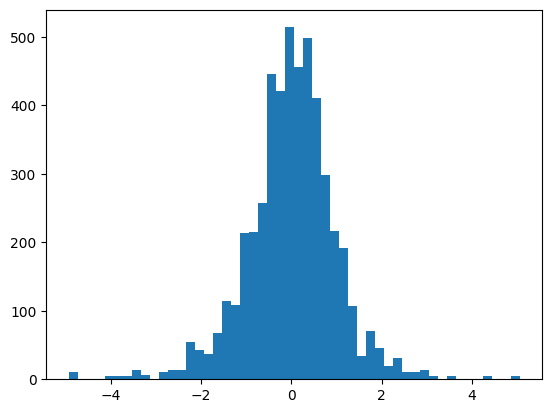

In [158]:
#Check the distribution
plt.hist(data_rel_transform['sold_price_scaled'], bins=50)

How do I scale this but also what is the use 
